# **Import** Modules

In [11]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
paths = []
labels = []
for dirname, _, filenames in os.walk('drive/MyDrive/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('Dataset is Loaded')

Dataset is Loaded


In [14]:
paths[:5]

['drive/MyDrive/TESS Toronto emotional speech set data/OAF_happy/OAF_bar_happy.wav',
 'drive/MyDrive/TESS Toronto emotional speech set data/OAF_happy/OAF_back_happy.wav',
 'drive/MyDrive/TESS Toronto emotional speech set data/OAF_happy/OAF_bean_happy.wav',
 'drive/MyDrive/TESS Toronto emotional speech set data/OAF_happy/OAF_base_happy.wav',
 'drive/MyDrive/TESS Toronto emotional speech set data/OAF_happy/OAF_bath_happy.wav']

In [15]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

In [16]:
df = pd.DataFrame()
df['speech']= paths
df['label'] = labels
df.head()

,speech,label
0,drive/MyDrive/TESS Toronto emotional speech se...,happy
1,drive/MyDrive/TESS Toronto emotional speech se...,happy
2,drive/MyDrive/TESS Toronto emotional speech se...,happy
3,drive/MyDrive/TESS Toronto emotional speech se...,happy
4,drive/MyDrive/TESS Toronto emotional speech se...,happy


In [17]:
df['label'].value_counts()

happy      669
fear       613
neutral    600
angry      600
disgust    600
ps         503
sad        400
Name: label, dtype: int64

# **Exploratory** **Data** **Analysis**



<Axes: xlabel='label', ylabel='count'>

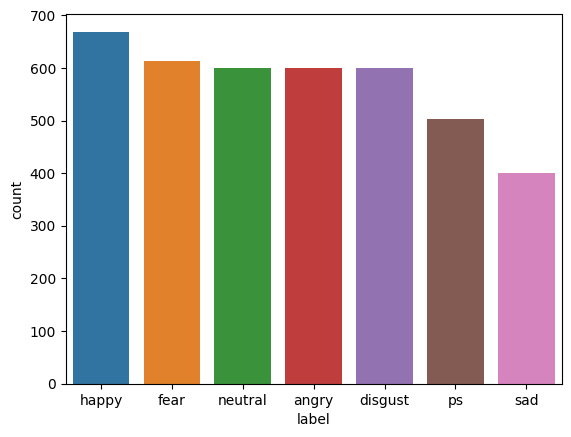

In [18]:
sns.countplot(data = df, x = 'label')

In [19]:
def waveplot(data, sr, emotion):
  plt.figure(figsize = (10,4))
  plt.title(emotion, size = 20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize = (11,4))
  plt.title(emotion, size = 20)
  librosa.display.specshow(xdb, sr=sr, x_axis = 'time', y_axis = 'hz')
  plt.colorbar()

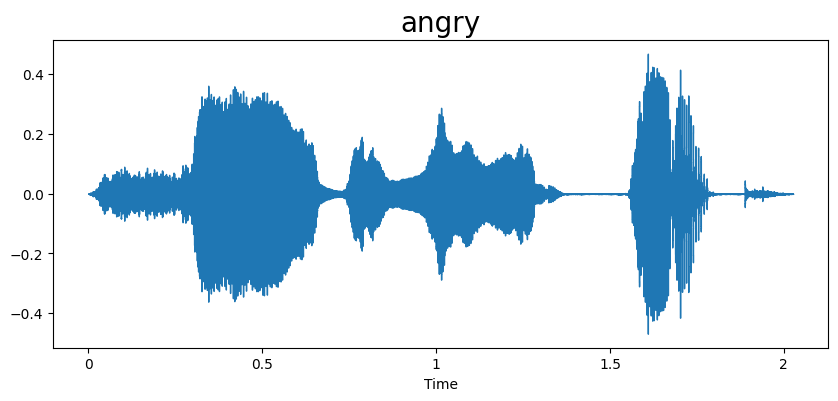

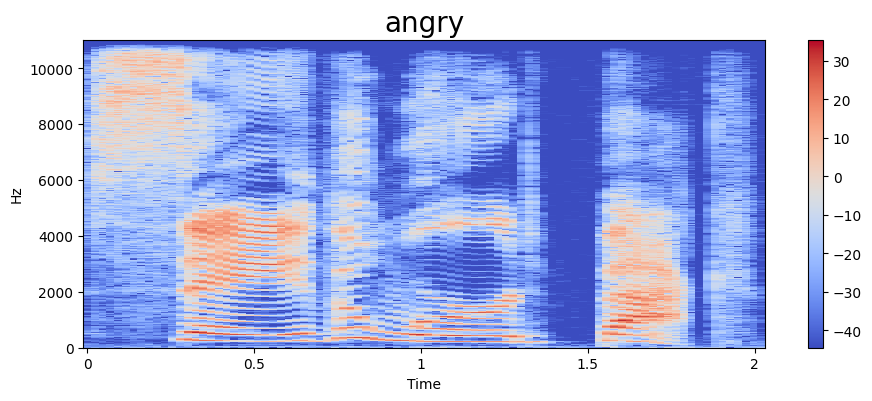

In [20]:
emotion = 'angry'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

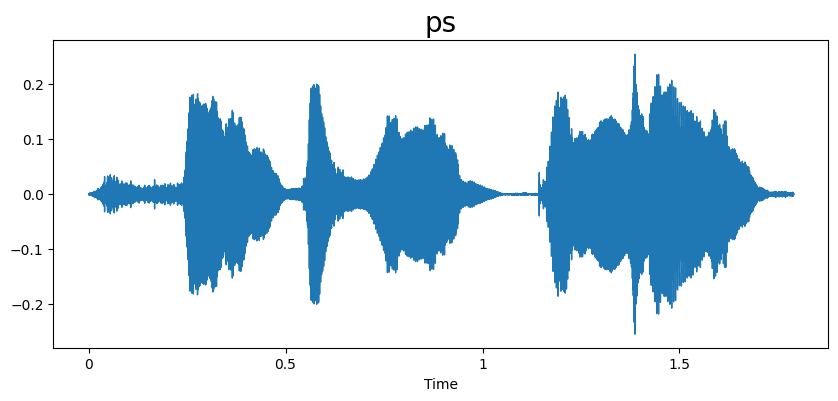

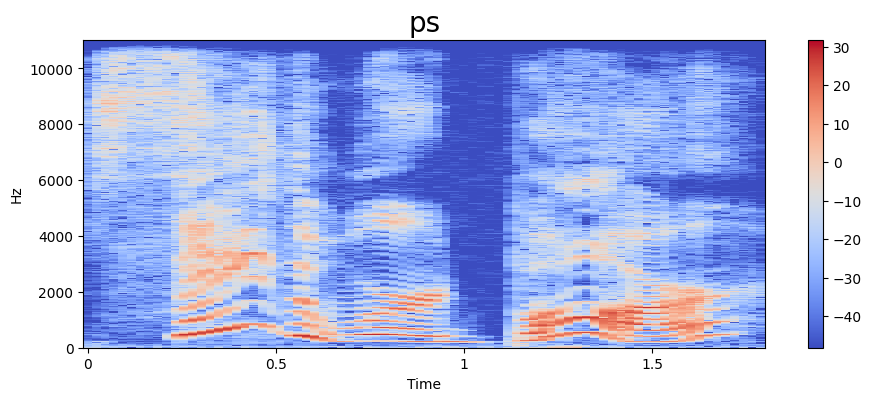

In [21]:
emotion = 'ps'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

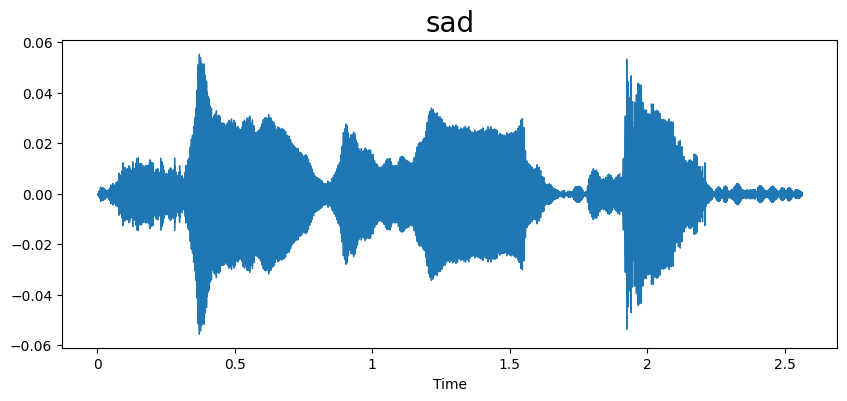

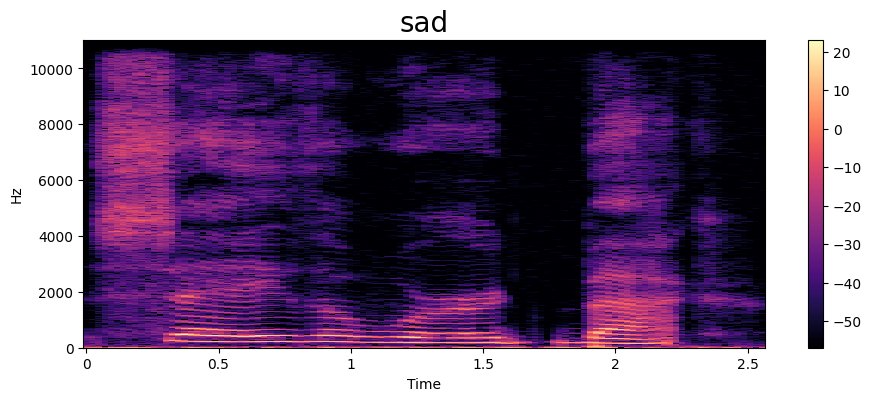

In [22]:
emotion = 'sad'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

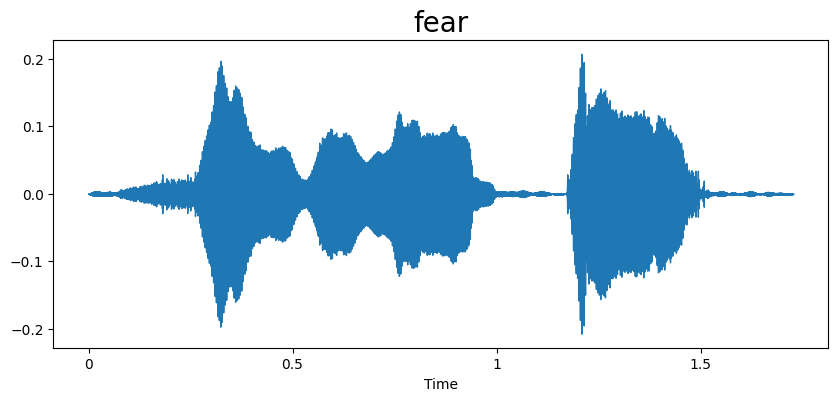

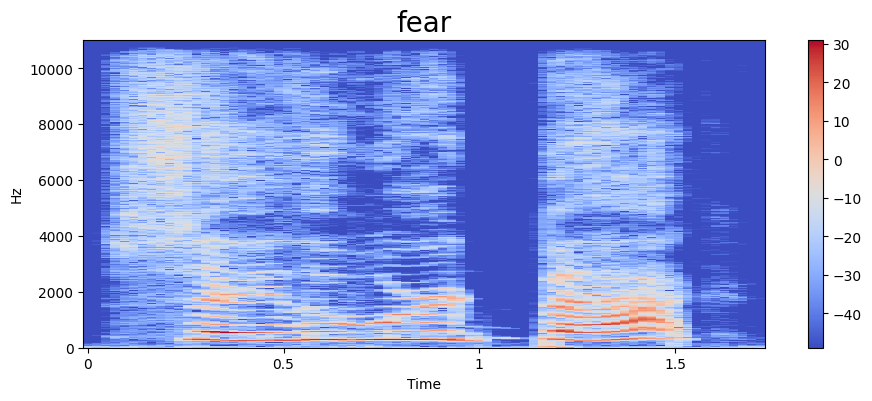

In [23]:
emotion = 'fear'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

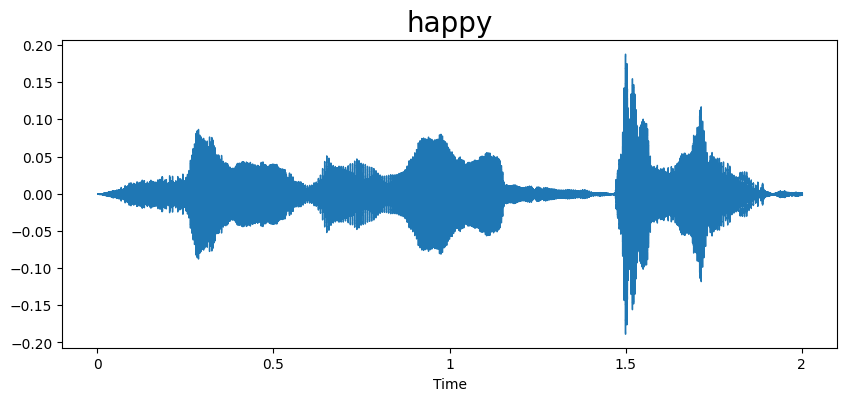

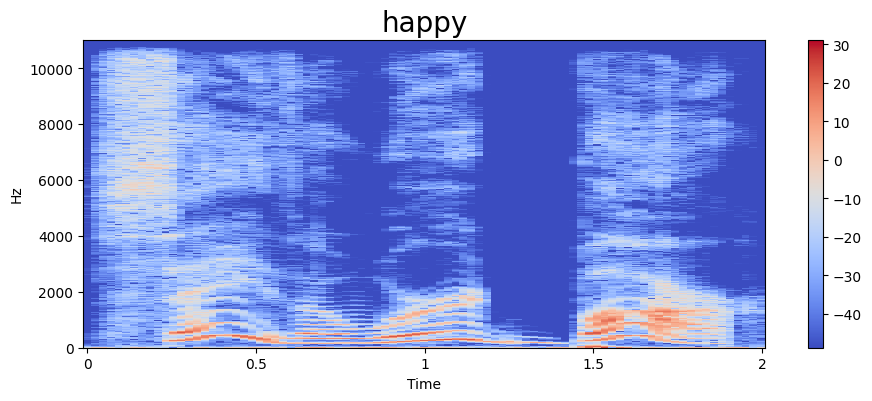

In [24]:
emotion = 'happy'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

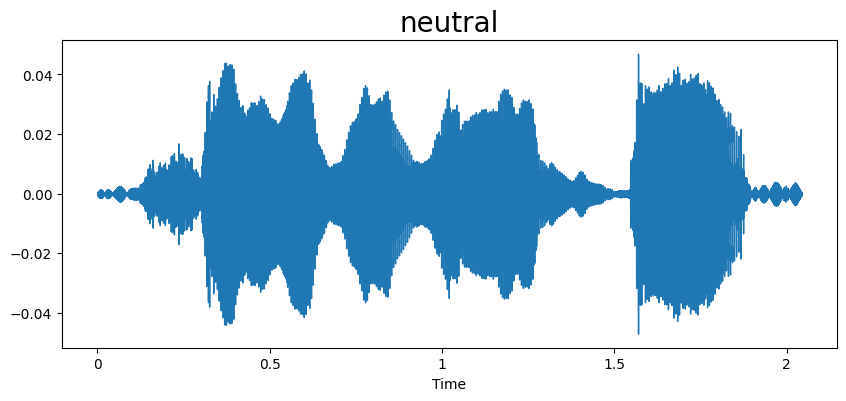

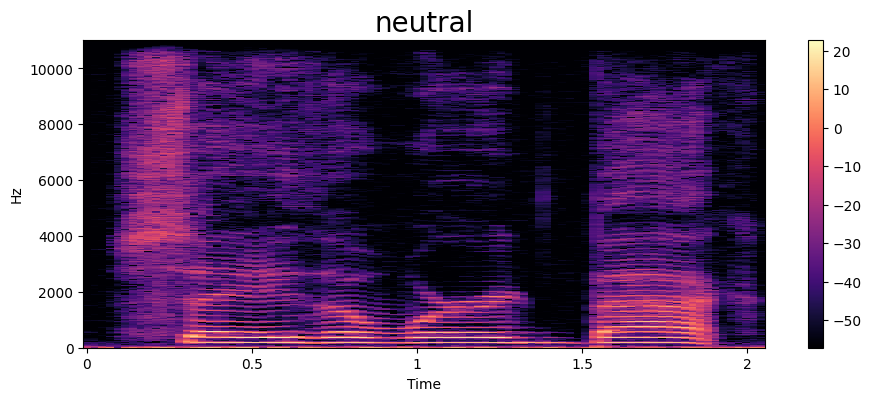

In [25]:
emotion = 'neutral'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

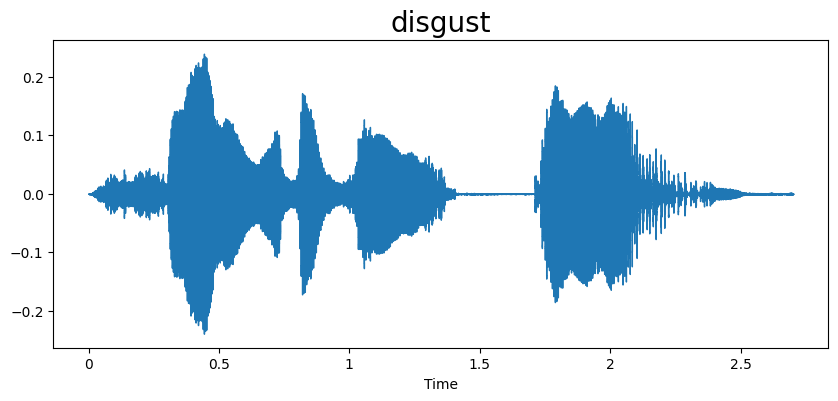

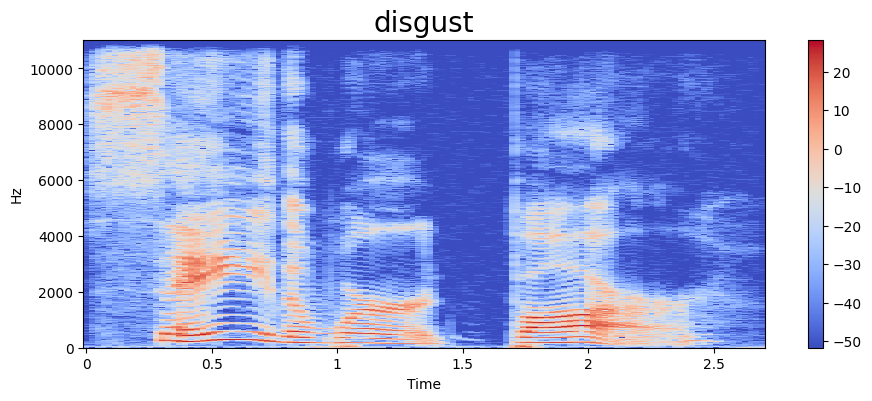

In [26]:
emotion = 'disgust'
path = np.array(df['speech'][df['label'] == emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

# **Feature** **Extraction**

In [27]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration = 3, offset = 0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc = 40).T, axis = 0)
  return mfcc

In [28]:
extract_mfcc(df['speech'][0])

array([-4.68270752e+02,  1.21735466e+02,  2.36624527e+01, -2.85613575e+01,
        1.28796494e+00,  9.35389996e+00, -3.22517896e+00, -4.07232904e+00,
       -1.40632219e+01,  2.33438313e-01, -1.49678221e+01, -2.55702615e+00,
       -4.09953117e+00, -5.54150105e+00,  4.93448228e-01, -1.13601930e-01,
       -2.26095811e-01,  6.41706991e+00,  1.50508988e+00, -7.76939583e+00,
       -5.93048111e-02,  3.13112068e+00, -3.98615718e-01,  5.47393703e+00,
       -7.88291574e-01,  4.83971834e+00,  2.40120912e+00,  8.24524021e+00,
       -2.36200023e+00,  5.67389059e+00, -5.05205214e-01,  4.76441383e+00,
        4.79159021e+00,  2.50027013e+00,  2.20207596e+00,  6.73442268e+00,
        6.96331143e-01,  3.28583932e+00,  5.64001608e+00,  1.10667582e+01],
      dtype=float32)

In [29]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [30]:
X_mfcc

0       [-468.27075, 121.735466, 23.662453, -28.561357...
1       [-493.50653, 108.03115, 13.071027, -14.596373,...
2       [-495.15918, 104.856224, 34.311256, 1.3047338,...
3       [-486.83273, 79.463455, 24.958443, 2.1231585, ...
4       [-479.21793, 105.47433, 15.626363, -15.771486,...
                              ...                        
3980    [-374.0504, 87.37929, -7.022097, 10.812925, -0...
3981    [-374.48767, 72.036545, 12.567796, 18.573978, ...
3982    [-391.8462, 100.0138, -3.7448778, 24.643173, 1...
3983    [-409.49863, 89.658905, -4.345877, 25.175097, ...
3984    [-420.40222, 80.02803, 6.2933507, 32.179893, 2...
Name: speech, Length: 3985, dtype: object

In [31]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(3985, 40)

In [32]:
# input split
X = np.expand_dims(X, -1)
X.shape

(3985, 40, 1)

In [33]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [34]:
y = y.toarray()

In [35]:
y.shape

(3985, 7)

# **LSTM** **Model**

In [36]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences = False, input_shape = (40,1)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 71747 

In [37]:

# Train Model
history = model.fit(X, y, validation_split = 0.2, epochs = 100, batch_size = 512, shuffle = True)

Epoch 1/100
7/7 [==============================] - 8s 700ms/step - loss: 1.8380 - accuracy: 0.2538 - val_loss: 1.9288 - val_accuracy: 0.2647
Epoch 2/100
7/7 [==============================] - 3s 478ms/step - loss: 1.5994 - accuracy: 0.3949 - val_loss: 1.7393 - val_accuracy: 0.4253
Epoch 3/100
7/7 [==============================] - 2s 298ms/step - loss: 1.3750 - accuracy: 0.4784 - val_loss: 1.4323 - val_accuracy: 0.4743
Epoch 4/100
7/7 [==============================] - 2s 320ms/step - loss: 1.1837 - accuracy: 0.5543 - val_loss: 1.0686 - val_accuracy: 0.5696
Epoch 5/100
7/7 [==============================] - 2s 314ms/step - loss: 1.0063 - accuracy: 0.6339 - val_loss: 0.8918 - val_accuracy: 0.5910
Epoch 6/100
7/7 [==============================] - 2s 321ms/step - loss: 0.8620 - accuracy: 0.6826 - val_loss: 0.8352 - val_accuracy: 0.6587
Epoch 7/100
7/7 [==============================] - 3s 481ms/step - loss: 0.7280 - accuracy: 0.7331 - val_loss: 0.8616 - val_accuracy: 0.6512
Epoch 8/100
7

# **Ploting** **the** **Results**

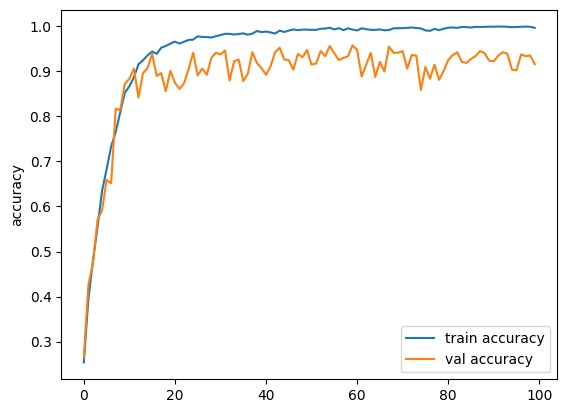

In [39]:
from keras.models import Sequential

epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy')
plt.plot(epochs, val_acc, label = 'val accuracy')
plt.xlabel = ('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

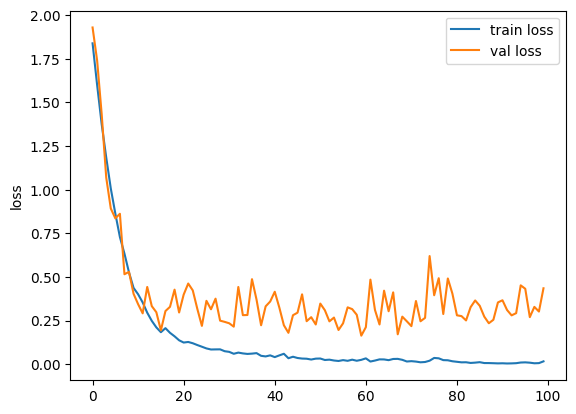

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label = 'train loss')
plt.plot(epochs, val_loss, label = 'val loss')
plt.xlabel = ('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()